#Uygulama 4: Destek Vektör Makinesi Algoritması Uygulaması (SVM) 

**Veri seti hakkında bilgi**<br>

Titanik veri seti, 1912 yılında meydana gelen ve tarihin en büyük deniz kazalarından biri olan Titanik faciasıyla ilgilidir. Veri seti, yolcuların isimleri, cinsiyetleri, yaşları, bilet sınıfları, taşıdıkları eşyalar, bilet ücretleri gibi çeşitli bilgileri içerir ve yolcuların hayatta kalma olasılıklarını tahmin etmek için kullanılabilir. Bu nedenle, veri seti makine öğrenmesi algoritmaları için sık kullanılan bir veri kaynağıdır.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ön Hazırlık** 
*   Uyarıları kapatma

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

**1. Aşama: Veri Toplama**

In [ ]:
import pandas as pd
df = pd.read_csv(
    "/content/drive/MyDrive/PythonileMakineOgrenmesi/VeriSetleri/Tr_titanik.csv")
df.head()

,Yolcu_id,Kurtuldu,seyahat_sinifi,Adi,Cinsiyeti,Yasi,Gemideki_krd_es,Gemideki_ebvyn_cocuk,Bilet_numarasi,Ucret,Kabin,Liman
0,1,0,3,"Braund, Mr. Owen Harris",erkek,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",kadın,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",kadın,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",kadın,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",erkek,35.0,0,0,373450,8.0500,NaN,S


Veri seti sütun açıklamaları:<br>
Yolcu_id: Yolcu kimlik numarası
Kurtuldu: Kurtulma durumu (0 = ölü, 1 = hayatta)
seyahat_sinifi: Seyahat sınıfı (1, 2 veya 3)
Adi: Yolcunun adı
Cinsiyeti: Yolcunun cinsiyeti (erkek veya kadın)
Yasi: Yolcunun yaş bilgisi
Gemideki_krd_es: Yolcunun gemideki eşi veya kardeşi sayısı
Gemideki_ebvyn_cocuk: Yolcunun gemideki ebeveyn veya çocuk sayısı
Bilet_numarasi: Yolcunun bilet numarası
Ucret: Yolcunun ödediği bilet ücreti
Kabin: Yolcunun kabin numarası
Liman: Yolcunun bindiği liman (C = Cherbourg, Q = Queenstown, S = Southampton)


**2. Aşama: Veri Ön İşleme**

*   Veri setine dair istatistiki bilgilerin görüntülenmesi.

In [ ]:
print(df.describe())
print(df.info())

         Yolcu_id    Kurtuldu  seyahat_sinifi        Yasi  Gemideki_krd_es  \
count  891.000000  891.000000      891.000000  714.000000       891.000000   
mean   446.000000    0.383838        2.308642   29.699118         0.523008   
std    257.353842    0.486592        0.836071   14.526497         1.102743   
min      1.000000    0.000000        1.000000    0.420000         0.000000   
25%    223.500000    0.000000        2.000000   20.125000         0.000000   
50%    446.000000    0.000000        3.000000   28.000000         0.000000   
75%    668.500000    1.000000        3.000000   38.000000         1.000000   
max    891.000000    1.000000        3.000000   80.000000         8.000000   

       Gemideki_ebvyn_cocuk       Ucret  
count            891.000000  891.000000  
mean               0.381594   32.204208  
std                0.806057   49.693429  
min                0.000000    0.000000  
25%                0.000000    7.910400  
50%                0.000000   14.454200  
75%

*   Eksik veri ve kullanılmayacak özleliklerin verisetinden çıkarılması

In [ ]:
#Kullanılmayacak özelliklerin kaldırılması
df=df.drop(["Adi","Bilet_numarasi", "Yolcu_id","Kabin"],axis=1)

#Eksik veri bulunan örneklerin silinmesi
df.dropna(inplace=True)

#Cinsiyeti değerini sayısal yapıya çevirme
df.Cinsiyeti.replace(["kadın","erkek"],[0,1],inplace=True)


*   Kategorik verilerin sayısal verilere çevrilmesi

In [ ]:
#Liman sütununun kukla değişkenlere dönüştürülmesi
dummies = pd.get_dummies(df['Liman'])
print(dummies)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
885  0  1  0
886  0  0  1
887  0  0  1
889  1  0  0
890  0  1  0

[712 rows x 3 columns]


*   Kategorik verilerin sayısal verilere çevrilmesi

S sütunu (kukla değişkeni) ve orijinal Liman sütunu veri setinden çıkarılıyor

In [ ]:
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Liman', 'S'], axis=1)


*   Girdi özellikleri ve hedef değişkeni (etiket) ayır

In [ ]:
y = df["Kurtuldu"]
X=df.drop(["Kurtuldu"],axis=1)
print("Özellikler: ", X.head())
print("***********************")
print("Hedef: ", y.head())

Özellikler:     seyahat_sinifi  Cinsiyeti  Yasi  Gemideki_krd_es  Gemideki_ebvyn_cocuk  \
0               3          1  22.0                1                     0   
1               1          0  38.0                1                     0   
2               3          0  26.0                0                     0   
3               1          0  35.0                1                     0   
4               3          1  35.0                0                     0   

     Ucret  C  Q  
0   7.2500  0  0  
1  71.2833  1  0  
2   7.9250  0  0  
3  53.1000  0  0  
4   8.0500  0  0  
***********************
Hedef:  0    0
1    1
2    1
3    1
4    0
Name: Kurtuldu, dtype: int64


*   Veri görselleştirerek ile veri setini inceleme

<AxesSubplot:xlabel='Kurtuldu', ylabel='count'>

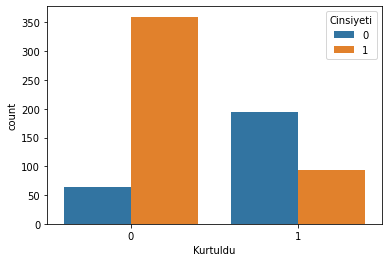

In [ ]:
import seaborn as sns
sns.countplot(x='Kurtuldu',hue='Cinsiyeti',data=df)

<AxesSubplot:xlabel='Kurtuldu', ylabel='count'>

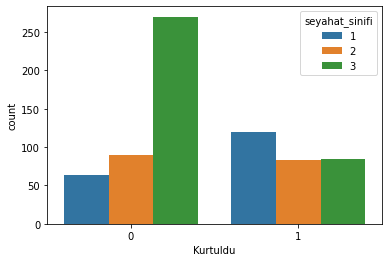

In [ ]:
import seaborn as sns
sns.countplot(x='Kurtuldu',hue='seyahat_sinifi',data=df)

* Eğitim ve test verisini ayır.






In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

**3. Aşama: Model Oluşturma**

*   SVC modelini tanımlama ve eğitme

In [ ]:
#Model seçme
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
#Modeli eğitme
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

**4.Aşama : Modeli Test Etme**

*   Test verileri ile modeli değerlendirme

In [ ]:
from sklearn.metrics import accuracy_score
print("----------------------------------------------------------------")
print("Eğitim verisi için doğruluk :", svc_model.score(X_train, y_train))
print("----------------------------------------------------------------")
print("Test verisi için doğruluk   :", svc_model.score(X_test, y_test))
y_pred = svc_model.predict(X_test)

----------------------------------------------------------------
Eğitim verisi için doğruluk : 0.7855887521968365
----------------------------------------------------------------
Test verisi için doğruluk   : 0.7552447552447552


*   Confusion Matrisi(Hata Matrisi) Tablo ve Grafik


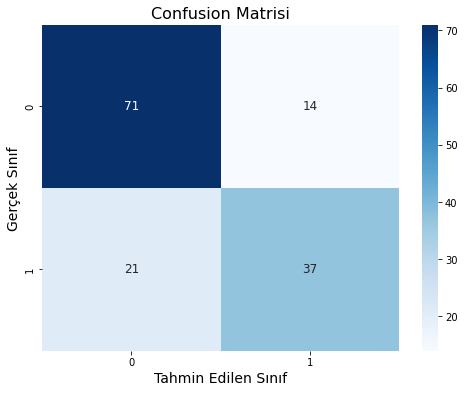

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Confusion matrisini görselleştirme 
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        85
           1       0.73      0.64      0.68        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



**5.Aşama : Modeli Yayma**

*   Modeli yayma, kullanma

In [ ]:
print("Aşağıdaki özellikleri giriniz")
ozellik=[]
ozellik.append(int(input("Seyahat Sınıfı               [1-3]   : ")))
ozellik.append(int(input("Cinsiyet           [Kadın:0/Erkek:1] : ")))
ozellik.append(int(input("Yaşı                                 : ")))
ozellik.append(int(input("Gemideki kardeş/eş sayısı            : ")))
ozellik.append(int(input("Gemideki ebeveyn/çocuk sayısı        : ")))
ozellik.append(int(input("Bilet ücreti                [30-500] : ")))
ozellik.append(int(input("C Kabin yolcusu mu? [Hayır:0/Evet:1] : ")))
ozellik.append(int(input("Q Kabin yolcusu mu? [Hayır:0/Evet:1] : ")))
print("***********************************************")
print(ozellik)
kurtuldu= svc_model.predict([ozellik])
print("***********************************************")
print()
if kurtuldu==1:  
  print ("[ Kazadan kurtuldu. ]")
else: print("[ Üzgünüm kazadan kurtulamadı gibi görünüyor. ]")

Aşağıdaki özellikleri giriniz
Seyahat Sınıfı               [1-3]   : 1
Cinsiyet           [Kadın:0/Erkek:1] : 0
Yaşı                                 : 35
Gemideki kardeş/eş sayısı            : 0
Gemideki ebeveyn/çocuk sayısı        : 0
Bilet ücreti                [30-500] : 30
C Kabin yolcusu mu? [Hayır:0/Evet:1] : 1
Q Kabin yolcusu mu? [Hayır:0/Evet:1] : 0
***********************************************
[1, 0, 35, 0, 0, 30, 1, 0]
***********************************************

[ Kazadan kurtuldu. ]
